In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_study['Mouse ID'].nunique()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'], keep= False)]
duplicate_mice['Mouse ID'].unique()


array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = mouse_study[mouse_study['Mouse ID']!= 'g989']
real_mice = mouse_clean['Mouse ID'].nunique()
real_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
standard_deviation = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
SEM = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
stats_df = pd.DataFrame ({ "Mean": mean,
                         'Median': median,
                         'Variance': variance,
                         'Standard Deviation': standard_deviation,
                         'SEM': SEM})
stats_df




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
stats_df2 = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg([np.mean, np.median, np.std, np.var, 'sem'])
stats_df2

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

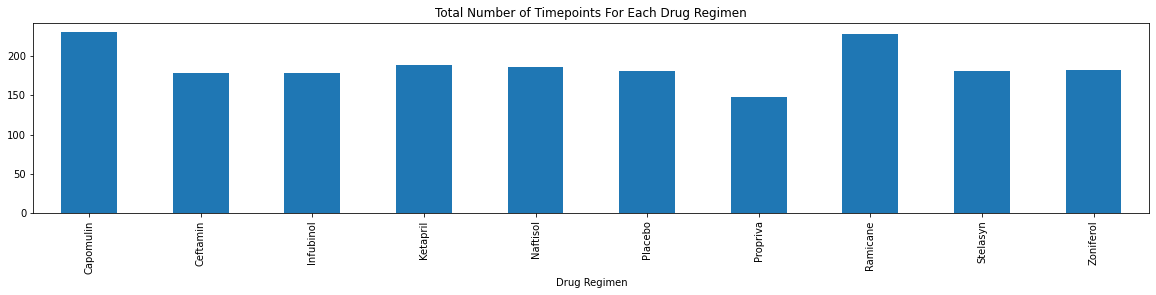

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoints = mouse_clean.groupby(['Drug Regimen'])['Timepoint'].count()
total_timepoints.plot(kind="bar", figsize=(20,3.5))
plt.title('Total Number of Timepoints For Each Drug Regimen')
plt.show()

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#x_axis= mouse_clean['Drug Regimen']
#y_axis = mouse_clean.groupby(['Drug Regimen'])['Timepoint'].count()
#plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

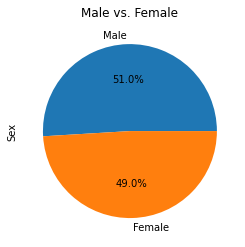

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
m_vs_f = mouse_clean['Sex'].value_counts()
plt.title('Male vs. Female')
m_vs_f.plot.pie(autopct= "%1.1f%%")
plt.show()

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [22]:
#For Capomulin
capomulin_data = mouse_clean.loc[mouse_clean['Drug Regimen'] == 'Capomulin',:]
capomulin_greatest = pd.DataFrame(capomulin_data.groupby('Mouse ID').max()['Timepoint'])
capomulin_df = mouse_clean.copy()
capomulin_merged = pd.merge(capomulin_greatest, capomulin_df, on=('Mouse ID', 'Timepoint'), how='left')

capomulin_merged.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [23]:
# For Ramicane
ramicane_data = mouse_clean.loc[mouse_clean['Drug Regimen'] == 'Ramicane',:]
ramicane_greatest = pd.DataFrame(ramicane_data.groupby('Mouse ID').max()['Timepoint'])
ramicane_df = mouse_clean.copy()
ramicane_merged = pd.merge(ramicane_greatest, ramicane_df, on=('Mouse ID', 'Timepoint'), how='left')

ramicane_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [24]:
#For Infubinol
infubinol_data = mouse_clean.loc[mouse_clean['Drug Regimen'] == 'Infubinol',:]
infubinol_greatest = pd.DataFrame(infubinol_data.groupby('Mouse ID').max()['Timepoint'])
infubinol_df = mouse_clean.copy()
infubinol_merged = pd.merge(infubinol_greatest, infubinol_df, on=('Mouse ID', 'Timepoint'), how='left')

infubinol_merged.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [25]:
# For Ceftamin
ceftamin_data = mouse_clean.loc[mouse_clean['Drug Regimen'] == 'Ceftamin',:]
ceftamin_greatest = pd.DataFrame(ceftamin_data.groupby('Mouse ID').max()['Timepoint'])
ceftamin_df = mouse_clean.copy()
ceftamin_merged = pd.merge(ceftamin_greatest, ceftamin_df, on=('Mouse ID', 'Timepoint'), how='left')

ceftamin_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
